# Visualize Genome
This document provides a way to visualize genomes and their derived networks

This is primarily intended as a debugging tool for development

In [7]:
%load_ext autoreload
%autoreload 2

In [254]:
from network import Network
from genome import Genome
from graphviz import Digraph

In [255]:
test_genome = Genome(3,2)
test_genome.mutate_new_node()

In [256]:
test_genome.mutate_new_weight()

In [257]:
test_genome.mutate_new_node()

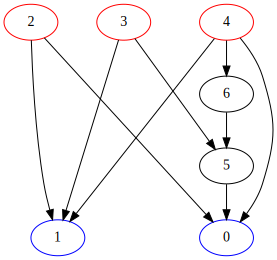

In [258]:
visualize_network(test_genome)

In [143]:
def visualize_network(genome):
    graph = Digraph()
    ins = Digraph()
    ins.graph_attr.update(rank='min')
    outs = Digraph()
    outs.graph_attr.update(rank='max')

    for node in genome.node_genes:
        lbl = str(node.identity)
        color = None
        if node.typ.value == 'input':
            color = 'red'
            ins.node(lbl, color='red')
        elif node.typ.value == 'output':
            color = 'blue'
            outs.node(lbl, color='blue')
        graph.node(lbl)

    graph.subgraph(ins)
    graph.subgraph(outs)
    for con in genome.connection_genes:
        graph.edge(str(con.in_node), str(con.out_node))
    return graph